In [3]:
!pip install openpyxl

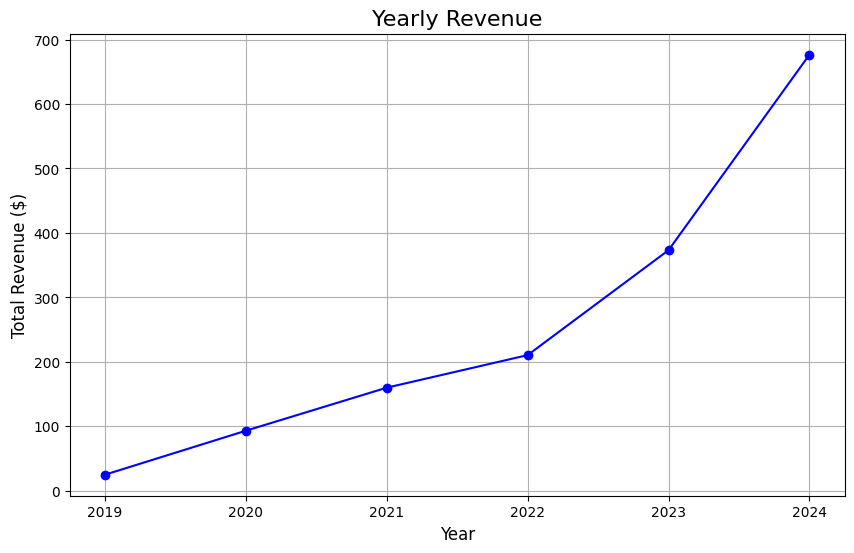

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the order_items data
order_items = pd.read_excel('order_items.xlsx')

# Convert the 'created_at' column to datetime
order_items['created_at'] = pd.to_datetime(order_items['created_at'])

# Extract the year and group by year, summing the revenue
revenue_by_year = order_items.groupby(order_items['created_at'].dt.year)['sale_price'].sum()

# Plot yearly revenue
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_year.index, revenue_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Yearly Revenue', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('yearly_revenue.png', dpi=300, bbox_inches='tight')  # Saves the figure with high resolution

# Show the plot
plt.show()


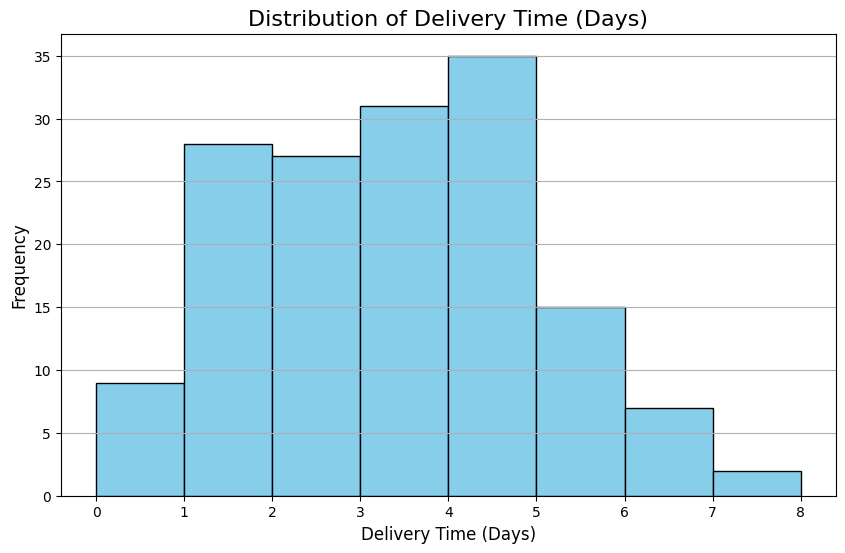

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the order_items data
order_items = pd.read_excel('order_items.xlsx')

# Convert relevant columns to datetime
order_items['created_at'] = pd.to_datetime(order_items['created_at'], errors='coerce')
order_items['delivered_at'] = pd.to_datetime(order_items['delivered_at'], errors='coerce')

# Keep only rows where both created_at and delivered_at are not NaN
order_items = order_items.dropna(subset=['created_at', 'delivered_at'])

# Calculate delivery time in days (delivered_at - created_at)
order_items['delivery_time'] = (order_items['delivered_at'] - order_items['created_at']).dt.days

# Filter for valid delivery times (>= 0)
order_items = order_items[order_items['delivery_time'] >= 0]

# Plot histogram for delivery time
plt.figure(figsize=(10, 6))
plt.hist(
    order_items['delivery_time'],
    bins=range(0, int(order_items['delivery_time'].max()) + 2),  # Adjust bins dynamically to avoid gaps
    color='skyblue',
    edgecolor='black'
)
plt.title('Distribution of Delivery Time (Days)', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')

# Save the histogram as a PNG file
plt.savefig('delivery_time_distribution.png', dpi=300, bbox_inches='tight')  # Saves with high resolution

# Show the plot
plt.show()
